Import Libraries

In [40]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,5)
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected = True)


Load Config File

In [41]:
import yaml

#read yaml file
with open('../config/config.yaml') as file:
  config= yaml.safe_load(file)
  #print(config)

### Read Dataset

Read the input file

In [42]:
#Get current working dir
cwd_path=os.getcwd()
#print(cwd_path)

#  Get the path of ROOT DIR
path_list = cwd_path.split(os.sep) #split path
ROOT_PATH=os.path.join(path_list[0],os.sep,*path_list[1:-2]) # To move two level up, remove last two str and join to create root path
#print(ROOT_PATH)



Read clean & Merged data

In [43]:
# process Data file
Process_Data_file=os.path.join(ROOT_PATH,config['processed_data_dir'],config['processed_data_file_1'])
print(Process_Data_file)

# Read the Sales input file name
try:
    Data=pd.read_csv(Process_Data_file)
    #sales_data.head()
except FileNotFoundError:
    print("file {} does not exist".format(Process_Data_file))



c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\processed\Merged_data.csv


Load the data

In [44]:
#df = Data.drop(columns=['Unnamed: 0'],axis=1)
Data.head()

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
0,MenClothing,524.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
1,MenClothing,496.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2,MenClothing,542.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
3,MenClothing,669.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
4,MenClothing,650.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1


Creating separate dataframe for Indpendent features and Target feature

In [45]:
Indpendent_features= Data[['MonthlyNominalGDPIndexinMillion', 'MonthlyRealGDPIndexinMillion',
       'CPI', 'unemploymentrate',
       'CommercialBankInterestRateonCreditCardPlans',
       'FinanceRateonPersonalLoansatCommercialBanks24MonthLoan',
       'Earningsorwagesindollarsperhour',
       'CottonMonthlyPriceUScentsperPoundlbs', 'Changein',
       'Averageuplandplantedmillionacres',
       'Averageuplandharvestedmillionacres', 'yieldperharvestedacre',
       'Productionin480lbnetwerightinmillionbales',
       'Millusein480lbnetwerightinmillionbales', 'Exports', 'Tempavg',
       'DewPointavg', 'Humidityavg', 'SeaLevelPressavg', 'Visibilityavg',
       'Windavg', 'Precipsum', 'Event', 'FederalHoliday']]

In [46]:
Target_features=Data[['SalesInThousandDollars']]
Target_features

,SalesInThousandDollars
0,524.0
1,496.0
2,542.0
3,669.0
4,650.0
...,...
247,1405.0
248,1261.0
249,1283.0
250,1478.0


In [47]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [48]:
# applying normalize ( ) to all columns 
Indpendent_features = Indpendent_features.apply(normalize)

##### Feature Importance using ANOVA

In [49]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest


Sel = SelectKBest(k =5, score_func = f_regression)
Sel.fit(Indpendent_features, Target_features)

c:\Users\Nishikant\anaconda3\envs\cr_Travel_Insurance_Sales_Forecasting\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectKBest(k=5, score_func=<function f_regression at 0x000001AD6A93AD40>)

In [50]:
#creating imporatnce features for Merged_Train data
Important_features = []
importances = Sel.scores_
indices = np.argsort(importances)[::-1]
for f in range(Indpendent_features.shape[1]):    
    Important_features = np.append(Important_features, Indpendent_features.columns.values[indices[f]])

In [51]:
Important_features

array(['MonthlyNominalGDPIndexinMillion', 'MonthlyRealGDPIndexinMillion',
       'CPI', 'Earningsorwagesindollarsperhour', 'unemploymentrate',
       'FinanceRateonPersonalLoansatCommercialBanks24MonthLoan',
       'CommercialBankInterestRateonCreditCardPlans', 'Event',
       'SeaLevelPressavg', 'Exports', 'Windavg', 'Changein',
       'yieldperharvestedacre', 'Millusein480lbnetwerightinmillionbales',
       'Averageuplandharvestedmillionacres', 'Humidityavg',
       'Averageuplandplantedmillionacres', 'FederalHoliday',
       'Productionin480lbnetwerightinmillionbales', 'Visibilityavg',
       'CottonMonthlyPriceUScentsperPoundlbs', 'Tempavg', 'DewPointavg',
       'Precipsum'], dtype='<U54')

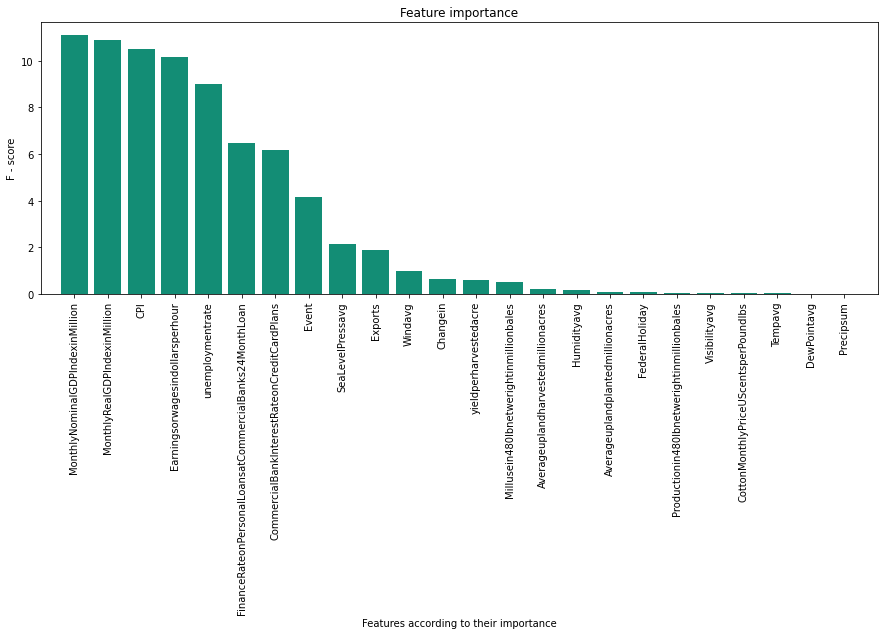

In [52]:
#plotting bar plot of feature importance
plt.figure(figsize =(15,5))
plt.title("Feature importance")
plt.bar(range(Indpendent_features.shape[1]), importances[indices],
       color="#138D75", align="center")
plt.xticks(range(Indpendent_features.shape[1]), Important_features, rotation = 90)
plt.xlim([-1, Indpendent_features.shape[1]])
plt.ylabel('F - score')
plt.xlabel('Features according to their importance')
plt.show()

In [53]:
feature_importance={'feature':Important_features,'importances':importances}

# Create DataFrame
feature_importance_df = pd.DataFrame(feature_importance)

feature_importance_df.head()
# saving the dataframe
feature_importance_df.to_csv('feature_importance_df.csv',index=False)